In [1]:
#install yfinance in order to work on the data
!pip install yfinance

import yfinance as yf

df = yf.download('TSLA', '2020-01-01','2021-02-01')

[*********************100%***********************]  1 of 1 completed


In [2]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...
2021-01-25,855.000000,900.400024,838.820007,880.799988,880.799988,41173400
2021-01-26,891.380005,895.900024,871.599976,883.090027,883.090027,23131600
2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000


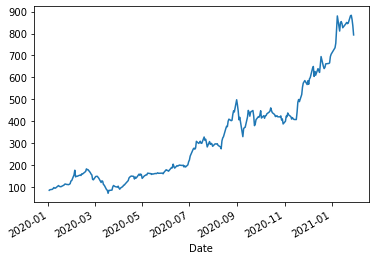

In [3]:
#plot closing prices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df['Close'].plot()

In [4]:
long=200
short =50

signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

#SMA of short moving average
signals['50DMA'] = df['Close'].rolling(window=50, min_periods=1).mean()

#SMA of long moving average
signals['200DMA'] = df['Close'].rolling(window=200, min_periods=1).mean() 

#create signals
signals['signal'][short:] = np.where(signals['50DMA'][short:] > signals['200DMA'][short:],1.0,0.0)

#generate trading orders
signals['positions'] = signals['signal'].diff()

print(signals)

            signal       50DMA      200DMA  positions
Date                                                 
2020-01-02     0.0   86.052002   86.052002        NaN
2020-01-03     0.0   87.327000   87.327000        0.0
2020-01-06     0.0   88.320666   88.320666        0.0
2020-01-07     0.0   89.693499   89.693499        0.0
2020-01-08     0.0   91.440399   91.440399        0.0
...            ...         ...         ...        ...
2021-01-25     1.0  655.835199  387.118909        0.0
2021-01-26     1.0  665.154399  390.961360        0.0
2021-01-27     1.0  674.202399  394.631209        0.0
2021-01-28     1.0  682.740999  398.098469        0.0
2021-01-29     1.0  690.449799  401.336290        0.0

[272 rows x 4 columns]


We can clearly see that for the points with a green mark, we should buy it at the green marks and sell at the red.

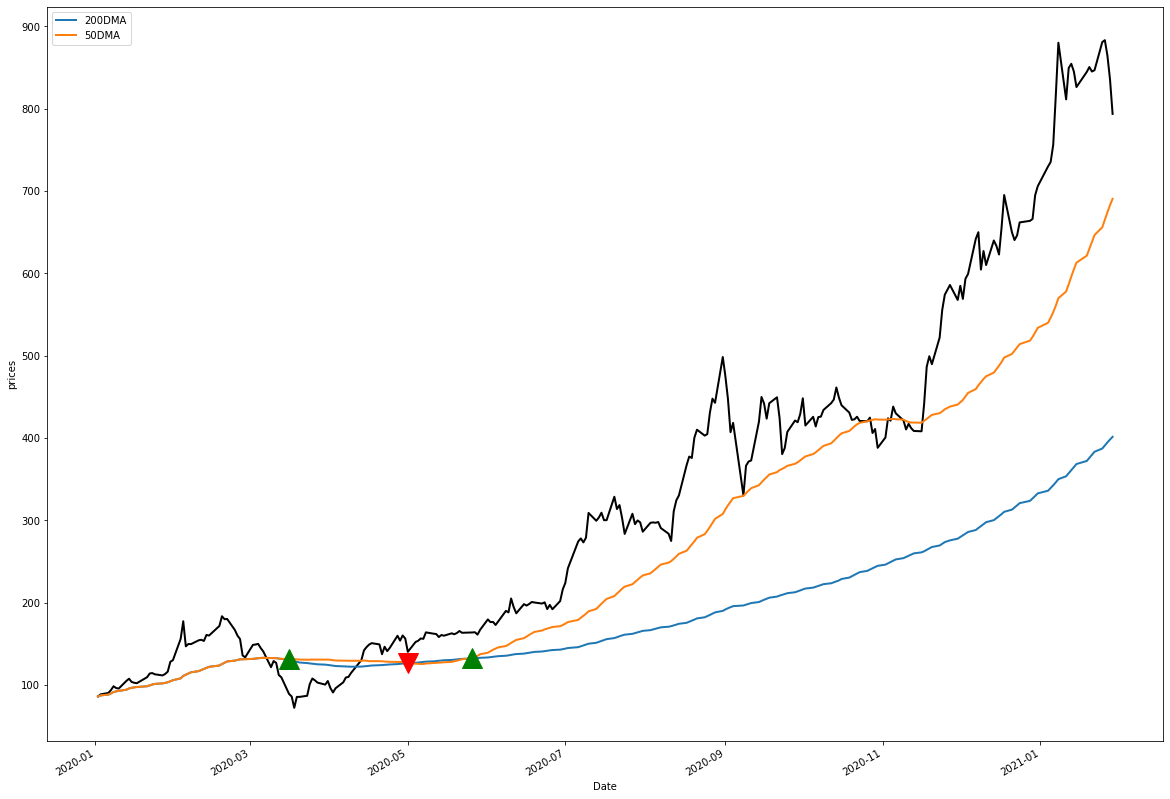

In [12]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(111, ylabel='prices')

#plot the close prices
df['Close'].plot(ax=ax1, color='black', lw=2)

#Plot the short and long moving averages
signals[['200DMA','50DMA']].plot(ax=ax1, lw=2)

ax1.plot(signals.loc[signals.positions==1.0].index, signals['50DMA'][signals.positions==1.0], '^', markersize=20, color='g')
ax1.plot(signals.loc[signals.positions==-1.0].index, signals['50DMA'][signals.positions==-1.0],'v',  markersize=20, color='r')